<a href="https://colab.research.google.com/github/Aishwarya-Battula/PP11--ANN-for-Binary-classification/blob/main/ANN_for_Churn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu


     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 41.6 MB/s 


In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.8.0


In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Divide the datset into independant and dependant features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [10]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [11]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [12]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)


In [14]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
X_test.shape

(2000, 11)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #converts to numpy arrays and normalizes the values between -1 and 1
X_test = sc.transform(X_test)


In [19]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [20]:
# Part 2 - Now let's make the ANN!

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [22]:
# Initialising the ANN
classifier = Sequential()

In [23]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [24]:
# Adding the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [25]:
# Adding the second hidden layer
classifier.add(Dense(units=5,activation='relu'))

In [26]:
# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [27]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [32]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3714 - accuracy: 0.8440 - val_loss: 0.3864 - val_accuracy: 0.8349
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3600 - accuracy: 0.8505 - val_loss: 0.3784 - val_accuracy: 0.8391
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3520 - accuracy: 0.8556 - val_loss: 0.3747 - val_accuracy: 0.8470
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3489 - accuracy: 0.8546 - val_loss: 0.3673 - val_accuracy: 0.8489
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3433 - accuracy: 0.8552 - val_loss: 0.3653 - val_accuracy: 0.8527
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3398 - accuracy: 0.8593 - val_loss: 0.3646 - val_accuracy: 0.8535
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3364 - accuracy: 0.8614 - val_loss: 0.3672 - val_accuracy:

In [33]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


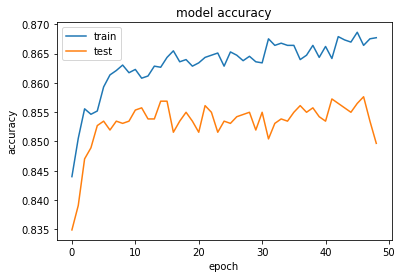

In [34]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

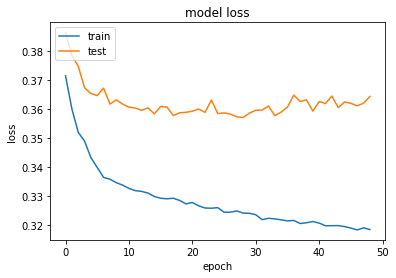

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1492,  103],
       [ 189,  216]])

In [40]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [41]:
score

0.854

In [42]:
#get the weights
classifier.get_weights()

[array([[-0.19740152,  0.07800572, -0.13181308, -0.11472382, -0.01118352,
         -0.21512306, -0.07808234,  0.02014505,  0.1429147 , -0.0096152 ,
         -0.00600877],
        [-0.31307018, -0.6398488 ,  0.05134919,  0.22892126, -0.7443173 ,
         -1.0613151 ,  0.50737786,  0.9474334 , -0.3261059 , -0.3262404 ,
         -0.12421609],
        [ 0.26607218,  0.02221421, -0.05968655,  0.3107071 , -0.304509  ,
         -0.20658657, -0.15947382, -0.00538883,  0.02534898, -0.24058473,
         -0.04826321],
        [ 0.27220646, -0.37869665,  0.25456974,  0.10953306, -0.29354072,
          0.6647425 , -0.41084024, -0.08947312, -0.32936823,  0.57382405,
          0.0550869 ],
        [ 0.26653588,  0.31214973, -0.14062934,  0.53408384, -0.06899548,
         -0.17868906, -0.75972635,  0.9810229 ,  0.50728416,  0.6641907 ,
          0.9883612 ],
        [ 0.12737253, -0.39534852, -0.5728951 , -0.44601667,  0.4935743 ,
         -0.12394718,  0.09110391,  0.11083886,  0.16994013,  0.2166140